In [2]:
# https://www.kaggle.com/khaledelhasafy/analyzing-exploring-and-applying-ml-models

In [4]:
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
import pandas as pd
from tabulate import tabulate
plt.style.use('dark_background')

In [5]:
dataset = pd.read_csv('CardioGoodFitness.csv')

In [7]:
dataset.head(10)

Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  Miles
0   TM195   18    Male         14        Single      3        4   29562    112
1   TM195   19    Male         15        Single      2        3   31836     75
2   TM195   19  Female         14     Partnered      4        3   30699     66
3   TM195   19    Male         12        Single      3        3   32973     85
4   TM195   20    Male         13     Partnered      4        2   35247     47
5   TM195   20  Female         14     Partnered      3        3   32973     66
6   TM195   21  Female         14     Partnered      3        3   35247     75
7   TM195   21    Male         13        Single      3        3   32973     85
8   TM195   21    Male         15        Single      5        4   35247    141
9   TM195   21  Female         15     Partnered      2        3   37521     85

In [9]:
dataset.tail(10)

Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  \
170   TM798   31    Male         16     Partnered      6        5   89641   
171   TM798   33  Female         18     Partnered      4        5   95866   
172   TM798   34    Male         16        Single      5        5   92131   
173   TM798   35    Male         16     Partnered      4        5   92131   
174   TM798   38    Male         18     Partnered      5        5  104581   
175   TM798   40    Male         21        Single      6        5   83416   
176   TM798   42    Male         18        Single      5        4   89641   
177   TM798   45    Male         16        Single      5        5   90886   
178   TM798   47    Male         18     Partnered      4        5  104581   
179   TM798   48    Male         18     Partnered      4        5   95508   

     Miles  
170    260  
171    200  
172    150  
173    360  
174    150  
175    200  
176    200  
177    160  
178    120  
179    180

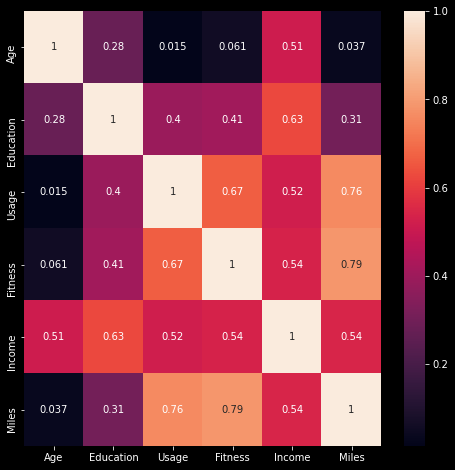

In [12]:
plt.figure(figsize=(8,8))  # on this line I just set the size of figure to 12 by 10.
p = sns.heatmap(dataset.corr(), annot=True)

In [14]:
dataset.shape

(180, 9)

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [16]:
dataset.describe()

Age   Education       Usage     Fitness         Income  \
count  180.000000  180.000000  180.000000  180.000000     180.000000   
mean    28.788889   15.572222    3.455556    3.311111   53719.577778   
std      6.943498    1.617055    1.084797    0.958869   16506.684226   
min     18.000000   12.000000    2.000000    1.000000   29562.000000   
25%     24.000000   14.000000    3.000000    3.000000   44058.750000   
50%     26.000000   16.000000    3.000000    3.000000   50596.500000   
75%     33.000000   16.000000    4.000000    4.000000   58668.000000   
max     50.000000   21.000000    7.000000    5.000000  104581.000000   

            Miles  
count  180.000000  
mean   103.194444  
std     51.863605  
min     21.000000  
25%     66.000000  
50%     94.000000  
75%    114.750000  
max    360.000000

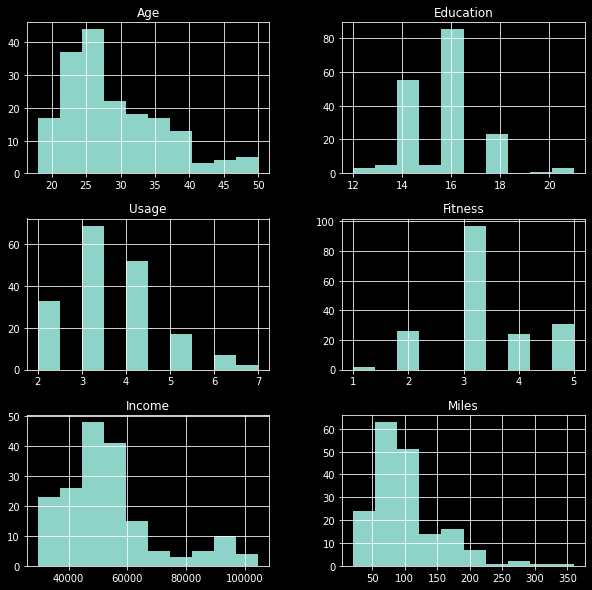

In [17]:
p = dataset.hist(figsize = (10,10))

In [18]:
dataset[['Income', 'Product']].groupby(['Product'], as_index=False).median().sort_values(by='Product', ascending=False)

Product   Income
2   TM798  76568.5
1   TM498  49459.5
0   TM195  46617.0

In [19]:
dataset[['Usage', 'Product']].groupby(['Product'], as_index=False).median().sort_values(by='Product', ascending=False)

Product  Usage
2   TM798      5
1   TM498      3
0   TM195      3

In [26]:
# dataset[['Miles', 'Product']].groupby(['Product'], as_index=False).median().sort_values(by='Product', ascending=False)
dataset.groupby(['Product'], as_index=False)['Miles'].median().sort_values(by='Product', ascending=False)

Product  Miles
2   TM798    160
1   TM498     85
0   TM195     85

In [27]:
dataset[['Fitness', 'Product']].groupby(['Product'], as_index=False).mean().sort_values(by='Product', ascending=False)

Product  Fitness
2   TM798   4.6250
1   TM498   2.9000
0   TM195   2.9625

  Product  Age
2   TM798   27
1   TM498   26
0   TM195   26


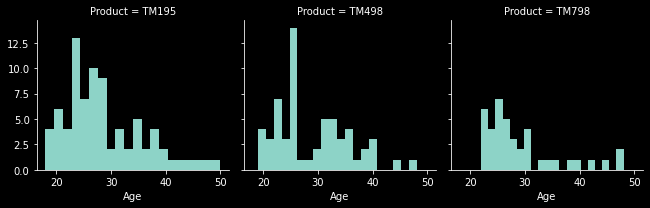

In [30]:
z = dataset[['Age', 'Product']].groupby(['Product'], as_index=False).median().sort_values(by='Product', ascending=False)
print(z)
g = sns.FacetGrid(dataset, col='Product')
g.map(plt.hist, 'Age', bins=20)


  Product  Education
2   TM798       17.0
1   TM498       15.0
0   TM195       15.0


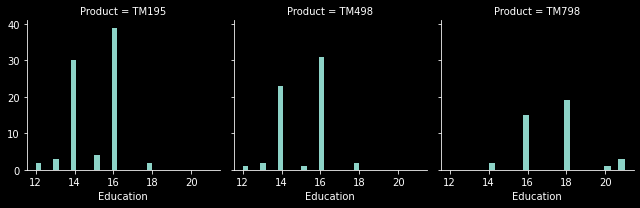

In [31]:
z = dataset[['Education', 'Product']].groupby(['Product'], as_index=False).mean().sort_values(by='Product', ascending=False).round()
print(z)
g = sns.FacetGrid(dataset, col='Product')
g.map(plt.hist, 'Education', bins=20)
#People with less education year were more interested in the lower model

In [32]:
g = sns.FacetGrid(dataset, col='Product')
g.map(plt.hist, 'Gender', bins=20)

In [34]:
groups = dataset[['Gender','MaritalStatus','Product']].groupby(['Gender','MaritalStatus',]).count().sort_values("Product",ascending=False )
print(groups)
groups.plot.bar(color="white")
plt.show()

                      Product
Gender MaritalStatus         
Male   Partnered           61
Female Partnered           46
Male   Single              43
Female Single              30


In [35]:
dataset[['Gender','Income',]].groupby(['Gender',]).median().sort_values("Income",ascending=False )

Income
Gender        
Male     52302
Female   47754

In [36]:
dataset = dataset.drop("Education" , axis = 1)

In [38]:
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=['Product' , 'Gender' , 'MaritalStatus'], return_df=True , verbose = None)

dataset = encoder.fit_transform(dataset)


/home/durgeshp/Documents/all_codes/myprojects/jupyter_test/venv/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [39]:
dataset.head()

Product  Age  Gender  MaritalStatus  Usage  Fitness  Income  Miles
0        1   18       1              1      3        4   29562    112
1        1   19       1              1      2        3   31836     75
2        1   19       2              2      4        3   30699     66
3        1   19       1              1      3        3   32973     85
4        1   20       1              2      4        2   35247     47

In [40]:
X = dataset.drop("Product" , axis=1)
y = dataset["Product"]

In [41]:
#Import Libraries
from sklearn.preprocessing import StandardScaler
#----------------------------------------------------
#Standard Scaler for Data
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
X = scaler.fit_transform(X)

In [46]:
from sklearn.model_selection import train_test_split
X_train ,X_test , y_train , y_test = train_test_split(X,y , test_size = 0.1 , random_state = 42)

In [57]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver = "newton-cg" , max_iter = 100 , C = 8)
classifier.fit(X_train, y_train)
print("logistic regression training score is " + str(classifier.score(X_train , y_train)))
print("logistic regression test score is " + str(classifier.score(X_test , y_test)))
print('----------------------------------------------------')

# Making the Confusion Matrix

from sklearn.metrics import confusion_matrix
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
p=sns.heatmap(cm, annot=True)


Logisticregressionscoretraining = classifier.score(X_train , y_train)
Logisticregressionscoretest = classifier.score(X_test , y_test)

logistic regression training score is 0.7222222222222222
logistic regression test score is 0.6666666666666666
----------------------------------------------------


In [48]:
# Making the Confusion Matrix

from sklearn.metrics import confusion_matrix
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
p=sns.heatmap(cm, annot=True)

In [49]:
from sklearn.neural_network import MLPClassifier
#----------------------------------------------------
#Applying MLPClassifier Model 
MLPClassifierModel = MLPClassifier(activation='tanh',
                                   solver='lbfgs',  
                                   learning_rate='constant',
                                   early_stopping= False,
                                   alpha=0.03,hidden_layer_sizes=(256,128) , max_iter=10000)
MLPClassifierModel.fit(X_train, y_train)
#Calculating Details
print('MLPClassifierModel Train Score is : ' , MLPClassifierModel.score(X_train, y_train))
print('MLPClassifierModel Test Score is : ' , MLPClassifierModel.score(X_test, y_test))
MLPClassifierModelTrainScore =  MLPClassifierModel.score(X_train, y_train)
MLPClassifierModelTestScore = MLPClassifierModel.score(X_test, y_test)

MLPClassifierModel Train Score is :  1.0
MLPClassifierModel Test Score is :  0.5


SVCModel Train Score is :  0.6604938271604939
SVCModel Test Score is :  0.7222222222222222
----------------------------------------------------


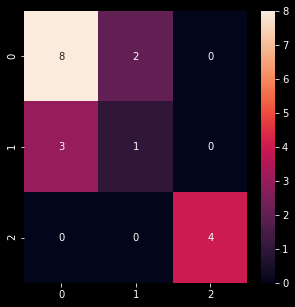

In [51]:
#Import Libraries
from sklearn.svm import SVC
SVCModel = SVC(kernel= 'linear')
SVCModel.fit(X_train, y_train)
#Calculating Details
print('SVCModel Train Score is : ' , SVCModel.score(X_train, y_train))
print('SVCModel Test Score is : ' , SVCModel.score(X_test, y_test))
print('----------------------------------------------------')
accuracy = SVCModel.score(X_test, y_test)

y_pred = SVCModel.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
p=sns.heatmap(cm, annot=True)

SVCModelscoretraining = SVCModel.score(X_train, y_train)
SVCModelscoretest = SVCModel.score(X_test, y_test)

In [52]:
#Import Libraries
from sklearn.naive_bayes import GaussianNB
GaussianNBModel = GaussianNB()
GaussianNBModel.fit(X_train, y_train)
print('GaussianNBModel Train Score is : ' , GaussianNBModel.score(X_train, y_train))
print('GaussianNBModel Test Score is : ' , GaussianNBModel.score(X_test, y_test))
print('----------------------------------------------------')
GaussianNBModelscoretrain = GaussianNBModel.score(X_train, y_train)
GaussianNBModelscoretest = GaussianNBModel.score(X_test, y_test)

GaussianNBModel Train Score is :  0.6604938271604939
GaussianNBModel Test Score is :  0.5555555555555556
----------------------------------------------------


In [53]:
#Import Libraries
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifierModel = KNeighborsClassifier(n_neighbors = 1, weights='distance',
                                               algorithm = 'auto')    
KNeighborsClassifierModel.fit(X_train, y_train)
print('KNeighborsclassifierModel Train Score is : ' , KNeighborsClassifierModel.score(X_train, y_train))
print('KNeighborsclassifierModel Test Score is : ' , KNeighborsClassifierModel.score(X_test, y_test))
print('----------------------------------------------------')
KNeighborsClassifierModelscoretraining = KNeighborsClassifierModel.score(X_train, y_train)
KNeighborsClassifierModelscoretest = KNeighborsClassifierModel.score(X_test, y_test)

KNeighborsclassifierModel Train Score is :  1.0
KNeighborsclassifierModel Test Score is :  0.5555555555555556
----------------------------------------------------


In [54]:
#Import Libraries
from sklearn.ensemble import RandomForestClassifier
#----------------------------------------------------

#Applying RandomForestClassifier Model 
RandomForestClassifierModel = RandomForestClassifier(criterion = 'gini',n_estimators=100,max_depth=2,random_state=33) #criterion can be also : entropy 
RandomForestClassifierModel.fit(X_train, y_train)

#Calculating Details
print('RandomForestClassifierModel Train Score is : ' , RandomForestClassifierModel.score(X_train, y_train))
print('RandomForestClassifierModel Test Score is : ' , RandomForestClassifierModel.score(X_test, y_test))
print('----------------------------------------------------')
RandomForestClassifierModeltrain =  RandomForestClassifierModel.score(X_train, y_train)
RandomForestClassifierModeltest = RandomForestClassifierModel.score(X_test, y_test)

RandomForestClassifierModel Train Score is :  0.7160493827160493
RandomForestClassifierModel Test Score is :  0.6666666666666666
----------------------------------------------------


In [55]:
#Import Libraries
from sklearn.ensemble import GradientBoostingClassifier
#----------------------------------------------------

#Applying GradientBoostingClassifier Model 

GBCModel = GradientBoostingClassifier(n_estimators=100,max_depth=3,random_state=33) 
GBCModel.fit(X_train, y_train)

#Calculating Details
print('GBCModel Train Score is : ' , GBCModel.score(X_train, y_train))
print('GBCModel Test Score is : ' , GBCModel.score(X_test, y_test))
GBCModeltraining = GBCModel.score(X_train, y_train)
GBCModeltesting =GBCModel.score(X_test, y_test)

GBCModel Train Score is :  1.0
GBCModel Test Score is :  0.7777777777777778


In [58]:
models = pd.DataFrame({
                          'Model': ['logistic regression ',
                                    'KNN', 
                                    'Naive Bayes', 
                                    'Linear SVC', 
                                    'Neural networks',
                                    "Random forest",
                                    "Gradient boosting"],
                       
                          'Scoretrain': [Logisticregressionscoretraining, 
                                         KNeighborsClassifierModelscoretraining, 
                                         GaussianNBModelscoretrain, 
                                         SVCModelscoretraining, 
                                         MLPClassifierModelTrainScore,
                                         RandomForestClassifierModeltrain,
                                         GBCModeltraining],
                       
                             'scoretest':[Logisticregressionscoretest,
                                          KNeighborsClassifierModelscoretest,
                                         GaussianNBModelscoretest,
                                          SVCModelscoretest,
                                          MLPClassifierModelTestScore,
                                          RandomForestClassifierModeltest,
                                          GBCModeltesting]})


print(tabulate(models , headers = ['Model' , 'Train' , 'Test'] , tablefmt = 'psql' , showindex =False)) 

+---------------------+----------+----------+
| Model               |    Train |     Test |
|---------------------+----------+----------|
| logistic regression | 0.722222 | 0.666667 |
| KNN                 | 1        | 0.555556 |
| Naive Bayes         | 0.660494 | 0.555556 |
| Linear SVC          | 0.660494 | 0.722222 |
| Neural networks     | 1        | 0.5      |
| Random forest       | 0.716049 | 0.666667 |
| Gradient boosting   | 1        | 0.777778 |
+---------------------+----------+----------+
